In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load dataset
data = pd.read_csv('Movie_Review.csv',encoding="ISO-8859-1")

# Check if 'text' column exists
print(data.columns)

Index(['text', 'sentiment'], dtype='object')


In [4]:
data.dropna(inplace=True)

In [5]:
# Define cleaning function
def clean_review(review):
    return ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))

# Apply function (make sure the column name is correct)
if 'text' in data.columns:
    data['text'] = data['text'].apply(clean_review)
else:
    print("Error: Column 'text' not found in DataFrame.")

# Display first few rows
print(data.head())

                                                text sentiment
0  daughter liked aghast, character movie smokes....       neg
1  I... words. words describe this. try sake brav...       neg
2  film basically poor take old urban legend baby...       neg
3  terrible movie, even sure terrible. ugly, one,...       neg
4  First movie piece reality well realized artist...       pos


In [6]:
from wordcloud import WordCloud

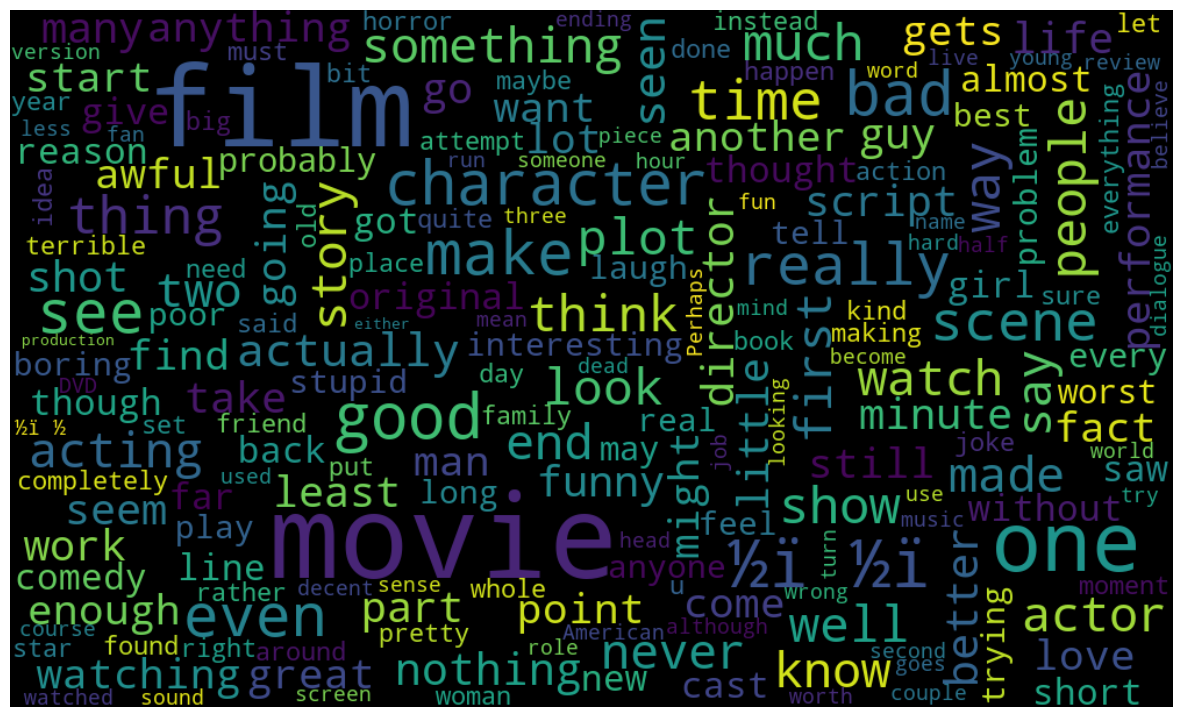

In [7]:
#draw Wordcloud
reviews = ' '.join(word for word in data['text'][data['sentiment'] == 'neg'].astype(str))
wordcloud = WordCloud(height = 600,width =1000, max_font_size = 100)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

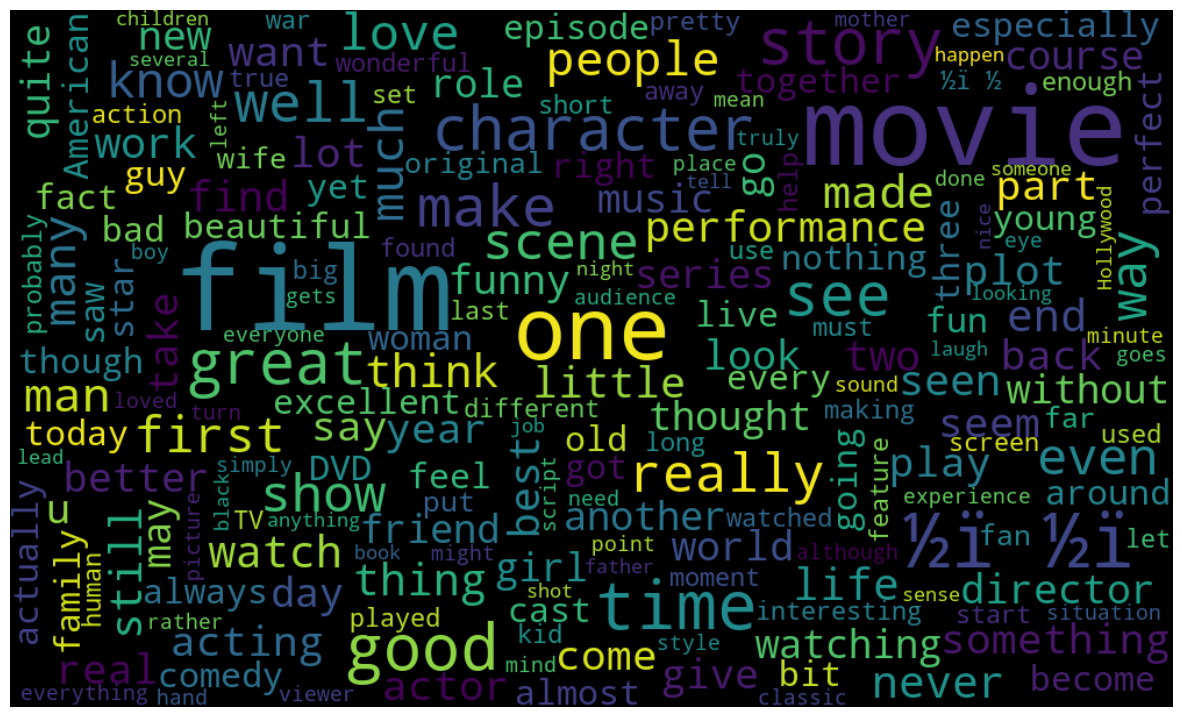

In [8]:
reviews = ' '.join(word for word in data['text'][data['sentiment']== 'pos'].astype(str))
wordcloud = WordCloud(height = 600, width = 1000, max_font_size =100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [10]:
reviews = cv.fit_transform(data['text']).toarray()

In [11]:
reviews

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.39922683]])

In [12]:
data['sentiment'] = data['sentiment'].replace(['pos','neg'],[1,0])

In [13]:
data['sentiment'].value_counts()

sentiment
0    500
1    500
Name: count, dtype: int64

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, data['sentiment'], test_size=0.2)

In [18]:
model.fit(reviews_train,sent_train)

LogisticRegression()

In [19]:
predict = model.predict(reviews_test)

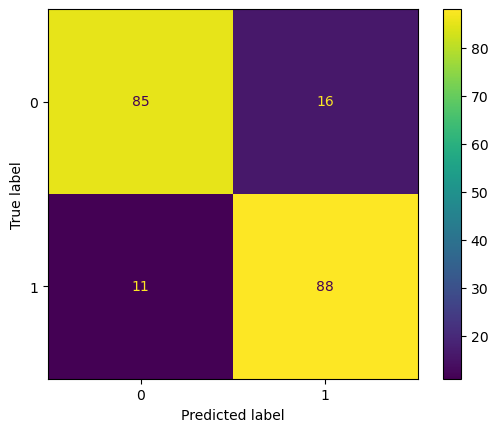

In [20]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(sent_test, predict, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
display.plot()
plt.show()

In [21]:
import pickle as pk

In [22]:
pk.dump(model,open('model.pkl','wb'))

In [23]:
pk.dump(cv,open('scaler.pkl','wb'))